In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

%matplotlib inline

In [20]:
newsgroups = fetch_20newsgroups(subset='all', shuffle=True)

In [21]:
print list(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [22]:
print len(newsgroups.data)
print len(newsgroups.target_names)

18846
20


In [23]:
data = TfidfVectorizer().fit_transform(newsgroups.data)

In [24]:
kmeans = KMeans(n_clusters=len(newsgroups.target_names), n_init=1)

In [25]:
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [26]:
reduced_data = TruncatedSVD(2).fit_transform(data)

[0, 0.5, -0.2, 0.2]

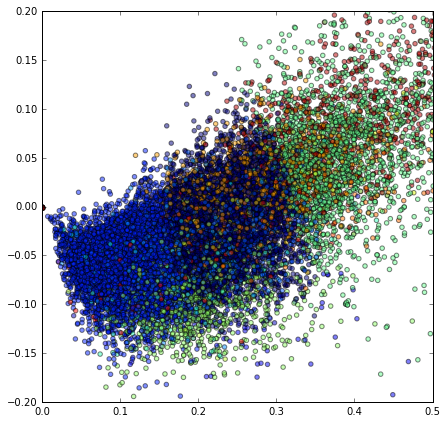

In [28]:
plt.figure(figsize = (7, 7))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=kmeans.labels_, alpha=0.5)
plt.axis([0, 0.5 , -0.2,0.2])